In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0,random_state=18,n_clusters_per_class=1)
X.shape,y.shape

((1000, 2), (1000,))

Plotting the data to see the which kernel can fit best

In [ ]:
df=pd.DataFrame(X)
df

,0,1
0,-1.771985,2.632987
1,0.906249,0.573154
2,0.764199,0.805540
3,0.181073,0.261031
4,-2.913305,2.424752
...,...,...
995,1.233748,0.812043
996,0.927687,1.526937
997,-0.146012,1.978593
998,1.530965,1.058032


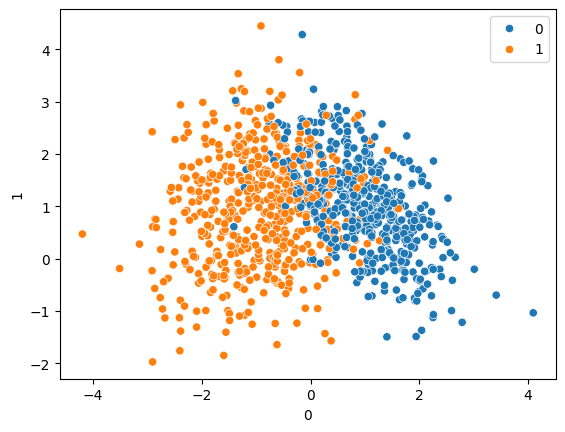

In [ ]:
sns.scatterplot(x=df[0],y=df[1],hue=y)
plt.show()

From these we can clearly see that the data is partialyy linearly distributed , first we take kerner as linear and then use ybr

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=18)
X_train.shape,y_train.shape

((700, 2), (700,))

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(random_state=18,shuffle=True)

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel= 'linear',random_state=18)
svc


SVC(kernel='linear', random_state=18)

In [ ]:
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=18)

In [ ]:
ypred=svc.predict(X_test)
ypred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
con=confusion_matrix(y_test,ypred)
print('confusion metrics:',con)
report=classification_report(y_test,ypred)
print('report',report)

confusion metrics: [[128  20]
 [ 19 133]]
report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       148
           1       0.87      0.88      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



If we use the kernel as rbf

In [ ]:
svc=SVC(kernel= 'rbf' ,random_state=18)
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)
con=confusion_matrix(y_test,ypred)
print('confusion metrics:',con)
report=classification_report(y_test,ypred)
print('report',report)

confusion metrics: [[132  16]
 [ 21 131]]
report               precision    recall  f1-score   support

           0       0.86      0.89      0.88       148
           1       0.89      0.86      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



# **Hyper parameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC(random_state=18)


In [ ]:
c=[0.001,0.01,0.05,1,10]
class_weight=[{0:i,1:j} for i in [1,10,20,50,100] for j in [1,10,20,50,100]]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma= ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
params=dict(
    C=c,
    class_weight=class_weight,
    kernel = kernel,
    gamma= gamma,
    decision_function_shape =decision_function_shape
)


In [ ]:
params

{'C': [0.001, 0.01, 0.05, 1, 10],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 20},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 20},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 20, 1: 1},
  {0: 20, 1: 10},
  {0: 20, 1: 20},
  {0: 20, 1: 50},
  {0: 20, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 20},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 20},
  {0: 100, 1: 50},
  {0: 100, 1: 100}],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto'],
 'decision_function_shape': ['ovo', 'ovr']}

In [ ]:
grid=GridSearchCV(estimator=svc,param_grid=params,scoring='accuracy',cv=cv)

In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=18, shuffle=True),
             estimator=SVC(random_state=18),
             param_grid={'C': [0.001, 0.01, 0.05, 1, 10],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 20}, {0: 1, 1: 50},
                                          {0: 1, 1: 100}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 20},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 20, 1: 1}, {0: 20, 1: 10},
                                          {0: 20, 1: 20}, {0: 20, 1: 50},
                                          {0: 20, 1: 100}, {0: 50, 1: 1},
                                          {0: 50, 1: 10}, {0: 50, 1: 20},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 20}, {0: 100, 1: 50},
                                          {0: 100, 1: 100}],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=18, shuffle=True),
             estimator=SVC(random_state=18),
             param_grid={'C': [0.001, 0.01, 0.05, 1, 10],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 20}, {0: 1, 1: 50},
                                          {0: 1, 1: 100}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 20},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 20, 1: 1}, {0: 20, 1: 10},
                                          {0: 20, 1: 20}, {0: 20, 1: 50},
                                          {0: 20, 1: 100}, {0: 50, 1: 1},
                                          {0: 50, 1: 10}, {0: 50, 1: 20},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 20}, {0: 100, 1: 50},
                                          {0: 100, 1: 100}],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

SVC(C=0.01, class_weight={0: 50, 1: 50}, decision_function_shape='ovo',
    gamma='auto', random_state=18)

In [ ]:
y_pred=grid.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:

con=confusion_matrix(y_test,ypred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[132  16]
 [ 21 131]]
report               precision    recall  f1-score   support

           0       0.86      0.89      0.87       148
           1       0.89      0.86      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



**RandomSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(estimator=svc,param_distributions=params,scoring='accuracy',cv=cv,)
rand.fit(X_train,y_train)
y_pred=rand.predict(X_test)
con=confusion_matrix(y_test,y_pred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[120  28]
 [ 13 139]]
report               precision    recall  f1-score   support

           0       0.90      0.81      0.85       148
           1       0.83      0.91      0.87       152

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

